### Домашнее задание №7

1. К алгоритму kNN, представленному на уроке, реализуйте добавление весов для соседей по любому из показанных на уроке принципов. Сравните точность нового алгоритма с исходным при разных значениях `k`.

2. (\*) Напишите функцию подсчета метрики качества кластеризации как среднее квадратичное внутрикластерное расстояние и постройте график ее зависимости от количества кластеров `k` (взять от 1 до 10) для выборки данных из данного урока (создать датасет, как в методичке).


In [1]:
import numpy as np
from sklearn import model_selection
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [2]:
X, y = load_iris(return_X_y=True)

# Для наглядности возьмем только первые два признака (всего в датасете их 4)
X = X[:, :2]

In [3]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=1)

In [27]:
X_train.shape

(120, 2)

In [4]:
def e_metrics(x1, x2):
    distance = 0
    for i in range(len(x1)):
        distance += np.square(x1[i] - x2[i])
    return np.sqrt(distance)

In [5]:
def knn(x_train, y_train, x_test, k):
    
    answers = []
    for x in x_test:
        test_distances = []
            
        for i in range(len(x_train)):
            
            # расчет расстояния от классифицируемого объекта до
            # объекта обучающей выборки
            distance = e_metrics(x, x_train[i])
            
            # Записываем в список значение расстояния и ответа на объекте обучающей выборки
            test_distances.append((distance, y_train[i]))
        
        # отберем k ближайших соседей
        k_neighbours = sorted(test_distances)[0:k]
                
        # создаем словарь со всеми возможными классами
        classes = {class_item: 0 for class_item in set(y_train)}
        
        # Сортируем список и среди первых k элементов подсчитаем частоту появления разных классов
        for d in k_neighbours:
            classes[d[1]] += 1 # вес каждого соседа равен 1
            
        # Записываем в список ответов наиболее часто встречающийся класс
        answers.append(sorted(classes, key=classes.get)[-1])
    return answers

In [6]:
def accuracy(pred, y):
    return (sum(pred == y) / len(y))

In [9]:
k = 5
y_pred = knn(X_train, y_train, X_test, k)
print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма при k = 5: 0.867


Добавим экспоненциальную зависимость весов от позиции соседа, таким образом, получим алгоритм weighted knn:

In [21]:
def knn_weighted(x_train, y_train, x_test, k, q = 0.6):
    
    answers = []
    for x in x_test:
        test_distances = []
            
        for i in range(len(x_train)):
            
            # расчет расстояния от классифицируемого объекта до
            # объекта обучающей выборки
            distance = e_metrics(x, x_train[i])
            
            # Записываем в список значение расстояния и ответа на объекте обучающей выборки
            test_distances.append((distance, y_train[i]))
        
        # отберем k ближайших соседей
        k_neighbours = sorted(test_distances)[0:k]
                
        # создаем словарь со всеми возможными классами
        classes = {class_item: 0 for class_item in set(y_train)}
        
        # Сортируем список и среди первых k элементов подсчитаем частоту появления разных классов
        q = 0.8
        for i, d in enumerate(k_neighbours):
            classes[d[1]] += q ** i
            
        # Записываем в список ответов наиболее часто встречающийся класс
        answers.append(sorted(classes, key=classes.get)[-1])
    return answers

In [22]:
k = 5
y_pred = knn_weighted(X_train, y_train, X_test, k)
print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма при k = 5: 0.800


Построим графики точности алгоритмов для разных k 

In [28]:
acc = []
acc_w = []
for k in range(1, 21):
    y_pred = knn(X_train, y_train, X_test, k)
    acc.append(accuracy(y_pred, y_test))
    y_pred_w = knn_weighted(X_train, y_train, X_test, k)
    acc_w.append(accuracy(y_pred_w, y_test))

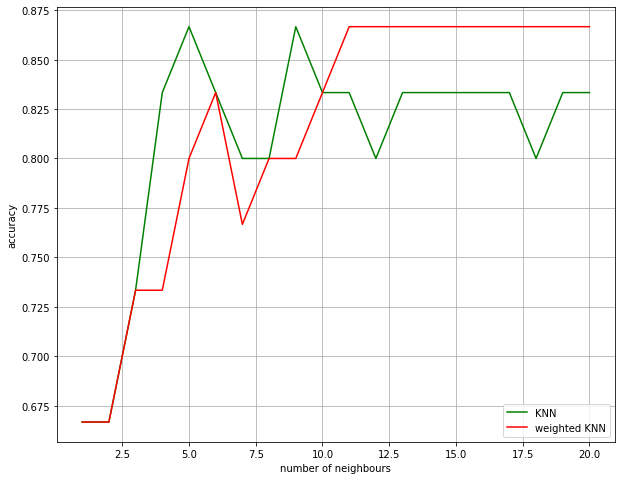

In [29]:
plt.figure(figsize = (10, 8))
plt.plot(list(range(1, 21)), acc, color = 'green', label = 'KNN')
plt.plot(list(range(1, 21)), acc_w, color = 'red', label = 'weighted KNN')
plt.xlabel('number of neighbours')
plt.ylabel('accuracy')
plt.legend(loc = "lower right")
plt.grid()
plt.show()

По графикам видно, что на малых k обычный алгоритм дает преимущество, в то время как на k>10 мы наблюдаем преимущество взвешенного алгоритма. Это поведение ожидаемо, так как при увеличении k среднее берется по все большей части датасета, и вклад в классификацию могут вносить совсем уж отдаленные соседи, которые попали в наше поле зрения только благодаря увеличению k. Экспоненциальная зависимость от порядкового номера делает вклад таких соседей ничтожным. 